# Psychophysics - practical tutorial

Zhuanghua Shi, Nov. 2022

In this tutorial, we quicly go through the basic grammar-like R codes, knowledge of psychometric function, and R packages for estimating psychometric functions. We will use the data from one published study as an example.


## 1. Basic grammar-like R codes

Since the introduction of [tidyverse](https://www.tidyverse.org/), R has become a very powerful language for data analysis. Unlike the traditional programming languages, tidyverse R codes are like a grammar, which is easy to read and understand. For those want to master R, I highly recommend the book [R for Data Science](https://r4ds.had.co.nz/), and online courses at [DataCamp](https://www.datacamp.com/), the website you should be able to access in this semester. In this tutorial, we will only use a few basic grammar-like R codes.

First we need to load the tidyverse package, which contains many useful functions for data analysis.

    library(tidyverse)

"Writing code is similar in many ways to write prose.", as the author of R for Data Science, Hadley, said. For a sentence we need a verb for action. Similarly, data analysis requires one action to another, removing outliers, selecting columns, summarizing the mean data. In tidyverse, we use the pipe operator `%>%` to connect the actions. For example, we want to remove those extreme slow response (RT in ms) trials from the data, we can write the code as:

    data %>% 
      filter(RT > 3000)

The above code interpret as an action: filter the data, and keep the trials with RT > 3000. The result is a new data frame, which is the input of the next action. We can also use the pipe operator to connect multiple actions. For example, we want to remove the extreme slow trials, and then select the columns of interest, we can write the code as:

    data %>% 
      filter(RT < 3000) %>% 
      select(subj, trial, RT, choice)

The output of the above data would be a new data frame with 4 columns: subj, trial, RT, choice, and all trials having RT no greater than 3000. The pipe operator `%>%` is very useful for data analysis, and you will see it in many R codes.

Note, the above output, a new dataframe or table, would be printed in the console. If you want to save the output as a new variable, you can use the assignment operator `<-` to assign the output to a new variable. For example, we can assign the output of the above code to a new variable `data_clean`:

    data_clean <- data %>% 
      filter(RT < 3000) %>% 
      select(subj, trial, RT, choice)

When I first came across the assignment operator `<-`, I was confused. The assignment requires two keypresses! But after a while, I realized there is another equivalent assignment operator `->`, an operator consistent with the direction of the pipe operator, rightward! For example, we can write the above code as:

    data %>% 
      filter(RT < 3000) %>% 
      select(subj, trial, RT, choice) -> data_clean

The above code is more consistent with the sequential actions of data analysis. The output of the first action is the input of the second action, and so on. The output of the last action is assigned to the variable `data_clean`. 

## 2. Key operators in tidyverse

There are four key operators in tidyverse: filter, select, group, and summarize. They are used to filter the data, select the columns, group by factors, and summarize the data. Here is a quick example of using these operators:
  
      data %>% 
        filter(RT < 3000) %>% 
        select(subj, trial, RT, choice) %>% 
        group_by(subj, choice) %>% 
        summarize(mean_RT = mean(RT))

Guess what is the output of the above code?

I will not go into the details of these operators. You can download the cheatsheet of tidyverse from [here](https://www.rstudio.com/resources/cheatsheets/). 

## 3. Psychometric function

Back to psychometric function. Psychometric function is a function that maps the stimulus intensity to the probability of response. For example, the probability of choosing the right option in a two-alternative forced choice (2AFC) task is a psychometric function of the stimulus intensity. 

A generic psychometric function has four parameters: threshold, slope, guess rate (lower asymptote), and lapse rate (upper asymptote). The threshold is the stimulus intensity at which the internal binary decision is 50 to 50. The slope, the steepness of the psychometric function, reflects the sensitivity of the judgments. Depending on the psychophysical task, the guess rate could be varied. For example, the two-interval foce choice (2IFC) task has a guess rate of 0.5, while 3AFC task has a guess rate of 1/3. The lapse rate reflects the probability of making a random response due to attentional lapse. The general psychometric function can be written as:

$$\Psi(x,\alpha, \beta, \gamma, \lambda) = \gamma + (1-\gamma -\lambda) F(x, \alpha, \beta)$$,

where $\alpha$ is the threshold, $\beta$ sensitivity, $\gamma$ chance level, and $\lambda$ lapse rate. $F(x, \alpha, \beta)$ is the 'inner' psychometric function, reflecting the sensory response. 

There are several candidates for the 'inner' psychometric function $F(x,\alpha, \beta)$:

* cumulative Gaussian function
* logit function
* Weibull

The cumulative Gaussian function is a natural outcome of the momentary threshold theory, which assumes the momentary threshold varies across trials, but follows a Gaussian distribution. The logit function comes from the hypothesis testing account, which assumes the sensory response is a hypothesis testing, the decision variable being the loglikelihood ratio of the two alternative responses:

$$ \log \frac{P}{1-P} = \beta(x-\alpha), $$

where $P$ is the probability of the positive responses, $1-P$ the negative response. The decison variable $\log \frac{P}{1-P}$ is assumed to be a linear function of the stimulus intensity $X$. The above equation is equivalent to 

$$ P = \frac{1}{1+ e^{-\beta(x-\alpha)}}$$

From the equation, we can easily obtained the point of subjective equality (PSE, $\alpha$) and just noticeable difference (JND). Notice, the JND is defined by the intensitz difference between the thresholds $P=0.5$ and $P=0.75$,  

$$JND = \log3/\beta$$




In [ ]:
# If you haven't install quickpsy, uncomment the following line
#install.packages(quickpsy)

In [29]:
# 1. Import necessary libraries 
library(tidyverse)
library(broom)
library(quickpsy)


## 4. Tutorial example

We have briefly discussed this example in the previous session. The data come from a recent study by Zhu et al. (2021). 

    Zhu, X., Baykan, C., Müller, H.J. et al. Temporal bisection is influenced by ensemble statistics of the stimulus set. Atten Percept Psychophys 83, 1201–1214 (2021). https://doi.org/10.3758/s13414-020-02202-z

The data and codes are available at https://github.com/msenselab/sets_in_bisection. 

In this study, the authors examined how the ensemble context (the statistics of the stimulus set) influences the temporal bisection, a psychophysical task that measures the sensitivity of temporal discrimination. A typical temporal bisection task provides two standards, a short and a long standard, and the participants are asked to judge a given duration being closer to the short or the long standards. The authors manipulated the ensemble context by varying the statistics of the stimulus set, such as spacing (Exp. 1), sampling frequency (Exp. 2), and the standard deviation of the stimulus set (Exp. 3). They found the ensemble context matters. 

Here we use their data of Exp. 2 as an example. The data are in the file `data/AllData_exp2.csv`. Let's load the data and take a look at the first few rows:


In [28]:

raw_bisection = read.csv('https://raw.githubusercontent.com/msenselab/sets_in_bisection/master/data/AllData_exp2.csv')
# show the head
head(raw_bisection)

,X.1,X,moda,durNo,cond,curDur,RP,NSub,NT,valid,NB
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,11,1,0.8,0,1,1,0,0
2,2,2,1,14,1,0.8,1,1,2,0,0
3,3,3,1,21,1,0.6,0,1,3,0,0
4,4,4,1,17,1,0.6,0,1,4,0,0
5,5,5,1,23,1,0.4,0,1,5,0,0
6,6,6,1,1,1,1.6,1,1,6,0,0


The key columns of the data are:
1. `cond`: 1 for decending frequent, 2 for ascending frequent. 
2. `curDur`: the duration of the test stimulus.
3. `RP`: 1 for close to the long standard, 2 for close to the short standard.
4. `NSub`: subject number.

## 5. Fitting the psychometric function

Before we fitting the psychometric function, let's take a look at the data. We can use the `ggplot` function to plot the data. The `ggplot` function is a powerful function for data visualization. It is very similar to the `plot` function in Matlab. Here is a quick example of using `ggplot`:

    library(ggplot2)
    ggplot(data, aes(x = x, y = y)) + geom_point()

Note that the `ggplot` function uses the operator `+` to add layers to the plot. The first layer is the data layer, which specifies the data and the variables to be plotted. The second layer is the geometric layer, which specifies the type of the plot. You can add more layers to the plot. For example, you can add a linear regression line to the plot by adding the `geom_smooth` layer.

`ggplot` also accepts the pipe operator `%>%`. For example, we can write the above code as:

    data %>% 
      ggplot(aes(x = x, y = y)) + geom_point()


`summarise()` has grouped output by 'NSub', 'cond'. You can override using the
`.groups` argument.


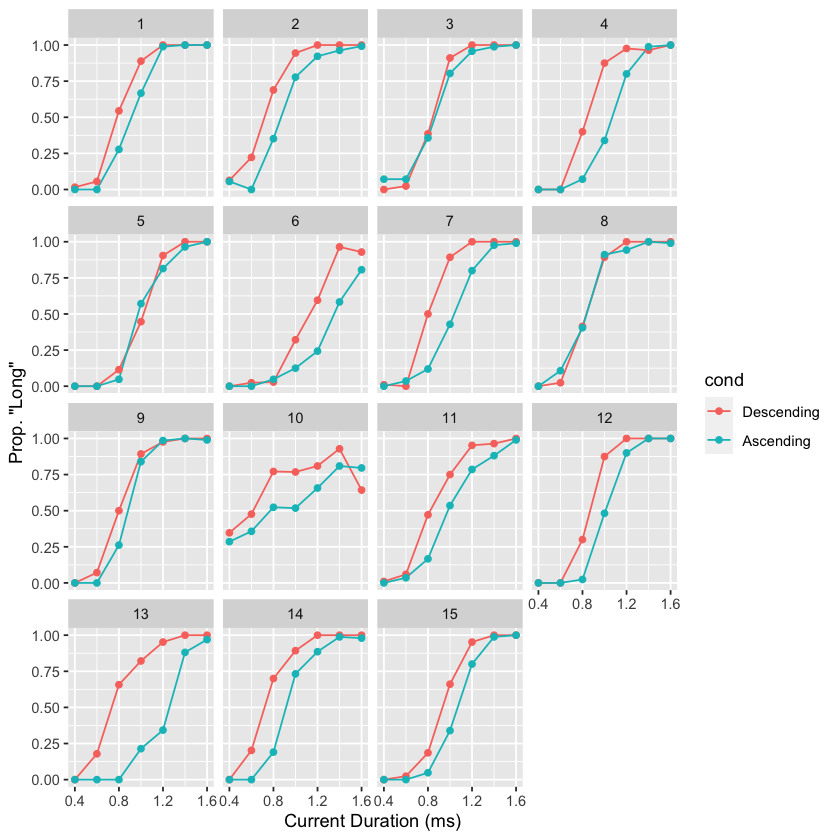

In [13]:
# factor the 'cond' column for readability
raw_bisection$cond = factor(raw_bisection$cond,labels = c('Descending', 'Ascending'))

# let's use raw_bisection data, quickly group by condition (cond) and the current duration (curDur) and 
# calculate the mean of the response (RP), and visualize them for each participant
raw_bisection %>% 
  group_by(NSub, cond,curDur) %>% 
  summarise(mRP = mean(RP), se = sd(RP)/sqrt(n())) %>% 
  ggplot(aes(x=curDur,y=mRP,group=cond,color=cond)) + 
  geom_line() + 
  geom_point() + 
  geom_errorbar(aes(ymin = mRP - se, ymax = mRP + se), width = .1) + 
  theme(legend.position = 'right') + 
  labs(x='Current Duration (ms)',y='Prop. "Long"') + 
  facet_wrap(~NSub)


In the above example, we use `facet_wrap()` in ggplot to plot separate participants, and use different color for different conditions. From the individual plots, we can see that the data showe a clear ensemble context biases. Decending frequency condition (red), more short samples, shifts the psychometric function to the left, meaning the participants are more likely to choose the 'close to the long standard' response for a given duration in the descening frequency (red), relative to the ascending frequency condition (blue), more long samples.



Let's now use the `Quickpsy` package to estimate the thresholds. 

Quickpsy is an R package developed by Daniel Linares and Joan Loópez-Moliner for fitting and plotting psychometric fucntions. You can find the introduction and quick tutorial from [their official website](http://dlinares.org/quickpsy.html). 

In [15]:
# Estimate psychometric function and PSEs
quickpsy(raw_bisection, x = curDur, k = RP, 
         grouping = .(cond,NSub), lapses = TRUE, 
         bootstrap = 'none') -> qp
# show the thresholds
head(qp$thresholds)


Warning message:
“`summarise_()` was deprecated in dplyr 0.7.0.
Please use `summarise()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


cond,NSub,thre,prob
<fct>,<int>,<dbl>,<dbl>
Descending,1,0.8016117,0.5
Descending,2,0.7228208,0.5
Descending,3,0.8365102,0.5
Descending,4,0.8417481,0.5
Descending,5,1.0131981,0.5
Descending,6,1.1167897,0.5


There is one special function called `plotcurves()` for visualized the estimated psychometric functions. 



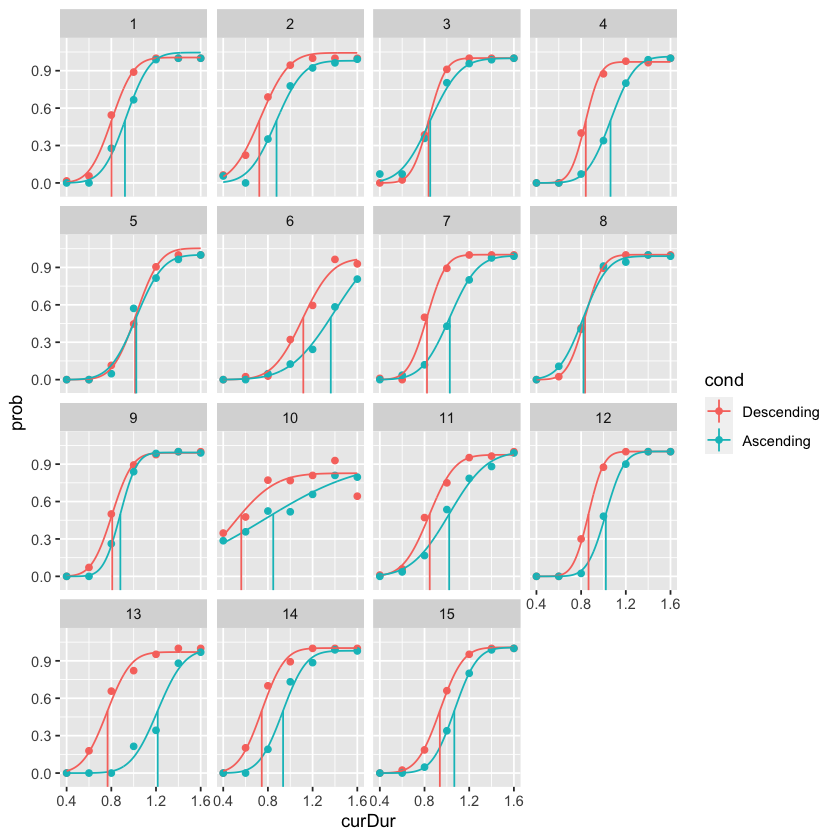

In [19]:
plotcurves(qp, panel = NSub)



In [24]:
head(qp$thresholds)

cond,NSub,thre,prob
<fct>,<int>,<dbl>,<dbl>
Descending,1,0.8016117,0.5
Descending,2,0.7228208,0.5
Descending,3,0.8365102,0.5
Descending,4,0.8417481,0.5
Descending,5,1.0131981,0.5
Descending,6,1.1167897,0.5


In [30]:
# using ezANOVA to test the effect of condition
#library(ez)
#ezANOVA(data = qp$thresholds, 
#        dv = thre, 
#        wid = NSub, 
#        within = cond, detailed = TRUE)

res = aov(thre ~ factor(cond) + Error(factor(NSub)), data = qp$thresholds)
summary(res)


Error: factor(NSub)
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14 0.4311  0.0308               

Error: Within
             Df  Sum Sq Mean Sq F value   Pr(>F)    
factor(cond)  1 0.19441 0.19441   27.58 0.000122 ***
Residuals    14 0.09868 0.00705                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1